In [2]:
# retrieve all the data for the cryptocurrencies for the past 
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from yahooquery import Screener
import requests

In [3]:
BTC_Ticker = yf.Ticker("BTC-USD")
BTC_Data = BTC_Ticker.history(period="max")

In [4]:
BTC_Data.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-04-14 00:00:00+00:00,30409.562500,31005.607422,30044.498047,30485.699219,22659995079,0.0,0.0
2023-04-15 00:00:00+00:00,30490.750000,30601.740234,30245.882812,30318.496094,11940685378,0.0,0.0
2023-04-16 00:00:00+00:00,30315.976562,30555.537109,30157.832031,30315.355469,12854816417,0.0,0.0
2023-04-17 00:00:00+00:00,30317.146484,30319.197266,29275.371094,29445.044922,17872186762,0.0,0.0
2023-04-19 00:00:00+00:00,30363.355469,30411.054688,30302.914062,30315.087891,19099566080,0.0,0.0


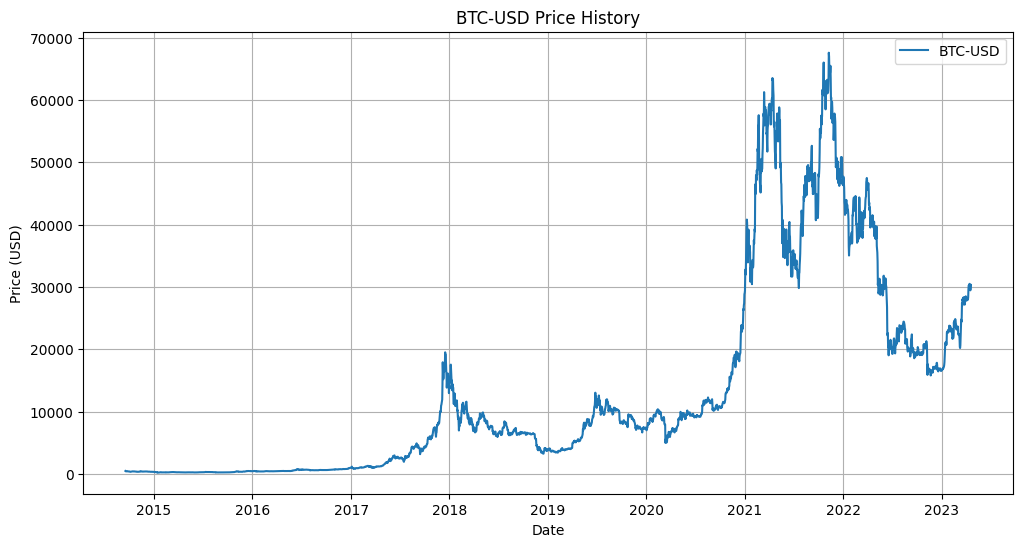

In [5]:
def get_data(ticker):
    ticker = yf.Ticker(ticker)
    data = ticker.history(period="max")
    return data

def linePlotter(ticker):
    data = get_data(ticker)
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['Close'], label=ticker)
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.title(f"{ticker} Price History")
    plt.legend()
    plt.grid()
    plt.show()


linePlotter("BTC-USD")


In [6]:
def getTickers():
    s = Screener()
    data = s.get_screeners('all_cryptocurrencies_us', count=250)
    dicts = data['all_cryptocurrencies_us']['quotes']
    symbols = [d['symbol'] for d in dicts]
    return symbols

def numTickers():
    return len(getTickers())

getTickers()

['BTC-USD',
 'ETH-USD',
 'USDT-USD',
 'BNB-USD',
 'USDC-USD',
 'XRP-USD',
 'ADA-USD',
 'DOGE-USD',
 'STETH-USD',
 'HEX-USD',
 'MATIC-USD',
 'SOL-USD',
 'DOT-USD',
 'LTC-USD',
 'AVAX-USD',
 'SHIB-USD',
 'WTRX-USD',
 'BUSD-USD',
 'TRX-USD',
 'DAI-USD',
 'WBTC-USD',
 'LINK-USD',
 'UNI7083-USD',
 'ATOM-USD',
 'OKB-USD',
 'LEO-USD',
 'ICP-USD',
 'ETC-USD',
 'XMR-USD',
 'XLM-USD',
 'TON11419-USD',
 'FIL-USD',
 'BCH-USD',
 'APT21794-USD',
 'LDO-USD',
 'TUSD-USD',
 'ARB11841-USD',
 'HBAR-USD',
 'NEAR-USD',
 'VET-USD',
 'CRO-USD',
 'APE18876-USD',
 'BTCB-USD',
 'ALGO-USD',
 'GRT6719-USD',
 'FTM-USD',
 'QNT-USD',
 'EOS-USD',
 'XRD-USD',
 'MANA-USD',
 'THETA-USD',
 'STX4847-USD',
 'AAVE-USD',
 'WBNB-USD',
 'EGLD-USD',
 'FLOW-USD',
 'AXS-USD',
 'XTZ-USD',
 'RPL-USD',
 'SAND-USD',
 'FRAX-USD',
 'IMX10603-USD',
 'CFX-USD',
 'BIT11221-USD',
 'USDP-USD',
 'CHZ-USD',
 'NEO-USD',
 'KCS-USD',
 'OP-USD',
 'CRV-USD',
 'KLAY-USD',
 'SNX-USD',
 'GMX11857-USD',
 'MKR-USD',
 'MINA-USD',
 'LUNC-USD',
 'FXS-USD'

In [7]:
# Here's a brief overview of each instrument type:

# Spot: Spot trading refers to the buying or selling of cryptocurrencies at the current market price. It involves the immediate settlement of transactions.

# Margin: Margin trading allows traders to borrow funds from the platform to trade a larger position size, increasing potential profits but also potential losses. It involves leveraging your position.

# Futures: Futures are financial contracts that oblige the buyer to purchase an asset (or the seller to sell an asset) at a predetermined future date and price. These contracts are typically used for hedging or speculating on the price movement of an asset.

# Options: Options are financial contracts that give the buyer the right, but not the obligation, to buy or sell an underlying asset at a specified price on or before a specified date. Options can be used for hedging, speculation, or generating income.

# Perpetual Swaps: Perpetual swaps are a type of derivative that allows traders to speculate on the price of an asset without actually owning it. They are similar to futures but do not have an expiration date, so positions can be held indefinitely.


def getRealTimePrice4All():
    try:
        r = requests.get("https://www.okx.com/api/v5/market/tickers?instType=SPOT")
        r.raise_for_status()
    except requests.exceptions.RequestException as e:
        print(f"Error: {e}")
    else:
        data = r.json()
        return data

def getRealTimePrice(ticker):
    try:
        r = requests.get(f"https://www.okx.com/api/v5/market/ticker?instId={ticker}-SWAP")
        r.raise_for_status()
    except requests.exceptions.RequestException as e:
        print(f"Error: {e}")
    else:
        data = r.json()
        return data


getRealTimePrice('ETH-USD')

{'code': '0',
 'msg': '',
 'data': [{'instType': 'SWAP',
   'instId': 'ETH-USD-SWAP',
   'last': '2099.82',
   'lastSz': '1',
   'askPx': '2100.1',
   'askSz': '1604',
   'bidPx': '2100.09',
   'bidSz': '6725',
   'open24h': '2069.52',
   'high24h': '2125.2',
   'low24h': '2069.52',
   'volCcy24h': '155345.2038',
   'vol24h': '32561051',
   'ts': '1681867939007',
   'sodUtc0': '2104.74',
   'sodUtc8': '2095.66'}]}

In [18]:
def realTimePrice():
    '''
    This function returns the real time price of all the cryptocurrencies
    '''
    url = "https://api.binance.com/api/v3/ticker/price"
    response = requests.get(url).json()
    return response

realTimePrice()

[{'symbol': 'ETHBTC', 'price': '0.06927700'},
 {'symbol': 'LTCBTC', 'price': '0.00334600'},
 {'symbol': 'BNBBTC', 'price': '0.01130100'},
 {'symbol': 'NEOBTC', 'price': '0.00042800'},
 {'symbol': 'QTUMETH', 'price': '0.00157900'},
 {'symbol': 'EOSETH', 'price': '0.00058000'},
 {'symbol': 'SNTETH', 'price': '0.00001397'},
 {'symbol': 'BNTETH', 'price': '0.00025700'},
 {'symbol': 'BCCBTC', 'price': '0.07908100'},
 {'symbol': 'GASBTC', 'price': '0.00011530'},
 {'symbol': 'BNBETH', 'price': '0.16310000'},
 {'symbol': 'BTCUSDT', 'price': '30272.91000000'},
 {'symbol': 'ETHUSDT', 'price': '2097.68000000'},
 {'symbol': 'HSRBTC', 'price': '0.00041400'},
 {'symbol': 'OAXETH', 'price': '0.00017780'},
 {'symbol': 'DNTETH', 'price': '0.00002801'},
 {'symbol': 'MCOETH', 'price': '0.00577200'},
 {'symbol': 'ICNETH', 'price': '0.00166300'},
 {'symbol': 'MCOBTC', 'price': '0.00021140'},
 {'symbol': 'WTCBTC', 'price': '0.00000802'},
 {'symbol': 'WTCETH', 'price': '0.00023700'},
 {'symbol': 'LRCBTC', 'p

In [15]:
def dayPriceChange(): 
    '''
    Returns the 24 hour price change for all the cryptocurrencies
    '''
    url = "https://api.binance.com/api/v3/ticker/24hr"
    response = requests.get(url).json()
    return response


dayPriceChange()

[{'symbol': 'ETHBTC',
  'priceChange': '-0.00130600',
  'priceChangePercent': '-1.851',
  'weightedAvgPrice': '0.06974040',
  'prevClosePrice': '0.07057200',
  'lastPrice': '0.06926700',
  'lastQty': '0.01860000',
  'bidPrice': '0.06926600',
  'bidQty': '31.82400000',
  'askPrice': '0.06926700',
  'askQty': '0.83510000',
  'openPrice': '0.07057300',
  'highPrice': '0.07092800',
  'lowPrice': '0.06874300',
  'volume': '81045.01930000',
  'quoteVolume': '5652.11217555',
  'openTime': 1681781846793,
  'closeTime': 1681868246793,
  'firstId': 413517633,
  'lastId': 413668069,
  'count': 150437},
 {'symbol': 'LTCBTC',
  'priceChange': '-0.00003400',
  'priceChangePercent': '-1.005',
  'weightedAvgPrice': '0.00340350',
  'prevClosePrice': '0.00338000',
  'lastPrice': '0.00334800',
  'lastQty': '1.22700000',
  'bidPrice': '0.00334700',
  'bidQty': '78.68400000',
  'askPrice': '0.00334800',
  'askQty': '2.10000000',
  'openPrice': '0.00338200',
  'highPrice': '0.00349000',
  'lowPrice': '0.003